# **SS2: PREPARA PARA APLICAR**


## AIRBNB DATASET - México

In [ ]:
# Paquetería 
import pandas as pd

In [ ]:
# Conexión con google drive - No olvidar entrar a la liga con la llave
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Modulo 6"

/content/drive/MyDrive/Colab Notebooks/Modulo 6


In [ ]:
# Lectura de Datos pd.read_csv("airbnb_mexico_dataset.csv")
datos = pd.read_csv("airbnb_mexico_dataset.csv")
datos.head()

,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month
0,35797,153786,28/06/2010,NaN,NaN,f,NaN,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,...,7,364,0,NaN,NaN,NaN,NaN,NaN,f,NaN
1,44616,196253,09/08/2010,within a few hours,1.0,f,Condesa,9,"['email', 'phone', 'reviews', 'offline_governm...",t,...,365,360,49,91.0,9.0,10.0,10.0,10.0,f,0.43
2,56074,265650,19/10/2010,within an hour,1.0,t,San Rafael,2,"['email', 'phone', 'facebook', 'reviews']",t,...,250,261,57,98.0,10.0,10.0,10.0,10.0,t,0.46
3,67703,334451,04/01/2011,within a day,1.0,f,Hipódromo,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,30,333,39,98.0,10.0,10.0,10.0,10.0,f,0.34
4,70644,212109,24/08/2010,within an hour,1.0,t,Coyoacán,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,180,183,103,98.0,10.0,10.0,10.0,10.0,f,0.92


In [ ]:
# Dimensión de datos
datos.shape

(15756, 31)

### Tema 1: Valores perdidos

In [ ]:
# is.na(nombre dataframe).sum() - Detectar cuántos valores perdidios tiene cada columna
# Reflexión sobre el número de variables y valores faltantes
pd.isna(datos).sum()

airbnb_id                         0
host_id                           0
host_since                        0
host_response_time             3864
host_response_rate             3864
host_is_superhost                 0
host_neighbourhood             7242
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   18
bedrooms                        614
beds                            225
price                             0
minimum_nights                    0
maximum_nights                    0
availability_365                  0
number_of_reviews                 0
review_scores_rating           3921
review_scores_cleanliness      3963
review_scores_checkin          3968
review_scores_communication 

In [ ]:
# Eliminar la columna de host_neighnouthood #imputar valores sería muy complicado, eliminarlos me quita el 50% de mis datos aprox. 
datos = datos.drop(['host_neighbourhood'], axis = 1)
datos.shape

(15756, 30)

In [ ]:
#Host response time - imputar con moda (Sugerencia)
#datos['host_response_time'].unique()
#datos['host_response_time'].value_counts().idxmax()

datos['host_response_time'].fillna(datos['host_response_time'].value_counts().idxmax(), inplace=True)

In [ ]:
# Host response rate - imputar con mediana # Percentiles # 50% 
#datos['host_response_rate'].describe()

datos['host_response_rate'].fillna(datos['host_response_rate'].median(), inplace=True)


In [ ]:
# Bathroom text
#¿Que pueden observar? 
#¿Valdría la pena dividirlo en 2 columnas? #baño compartido

datos['bathrooms_text'].unique()


array(['1 bath', '5.5 baths', '1.5 baths', '1 private bath', '4.5 baths',
       '1 shared bath', '0 baths', '2 baths', '1.5 shared baths',
       '6 baths', nan, '3.5 baths', '2.5 baths', '3 baths',
       '2 shared baths', '4 baths', '5 baths', '8 shared baths',
       '3 shared baths', '3.5 shared baths', '4 shared baths', '10 baths',
       '50 baths', '0 shared baths', '16 baths', '5 shared baths',
       '10.5 baths', '7 baths', '2.5 shared baths', '20 baths',
       '4.5 shared baths', 'Half-bath', '10 shared baths',
       '6.5 shared baths', '5.5 shared baths', 'Shared half-bath',
       '8.5 baths', '7.5 baths', '6.5 baths', '14 baths',
       '15 shared baths', 'Private half-bath', '9.5 baths', '11 baths',
       '9 shared baths', '8 baths', '6 shared baths', '7.5 shared baths',
       '13 baths'], dtype=object)

In [ ]:
datos['bathrooms_text'].replace({"Shared half-bath":"0.5 shared", "Private half-bath":"0.5 baths", "Half-bath":"0.5 bath"}, inplace=True) #sustituye valor completo de celdas

In [ ]:
bathrooms = datos['bathrooms_text'].str.split(" ", n = 1, expand = True) 
#bathrooms
bathrooms.columns = ['bathrooms', 'bathrooms_type']
bathrooms

,bathrooms,bathrooms_type
0,1,bath
1,5.5,baths
2,1,bath
3,1,bath
4,1,bath
...,...,...
15751,1,bath
15752,2,baths
15753,1,bath
15754,1,bath


In [ ]:
bathrooms['bathrooms']= pd.to_numeric(bathrooms['bathrooms'])

In [ ]:
bathrooms['bathrooms'].describe()

count    15738.000000
mean         1.392617
std          1.058903
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         50.000000
Name: bathrooms, dtype: float64

In [ ]:
bathrooms['bathrooms_type'].unique()

array(['bath', 'baths', 'private bath', 'shared bath', 'shared baths',
       nan, 'shared'], dtype=object)

In [ ]:
bathrooms['bathrooms_type'].replace({"bath":"no information", "baths":"no information", "private bath":"private", "shared bath":"shared", "shared baths":"shared"}, inplace=True)

In [ ]:
datos = datos.join(bathrooms)
datos.head()

,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,bathrooms,bathrooms_type
0,35797,153786,28/06/2010,within an hour,1.0,f,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,...,0,NaN,NaN,NaN,NaN,NaN,f,NaN,1.0,no information
1,44616,196253,09/08/2010,within a few hours,1.0,f,9,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,49,91.0,9.0,10.0,10.0,10.0,f,0.43,5.5,no information
2,56074,265650,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,...,57,98.0,10.0,10.0,10.0,10.0,t,0.46,1.0,no information
3,67703,334451,04/01/2011,within a day,1.0,f,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,39,98.0,10.0,10.0,10.0,10.0,f,0.34,1.0,no information
4,70644,212109,24/08/2010,within an hour,1.0,t,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,103,98.0,10.0,10.0,10.0,10.0,f,0.92,1.0,no information


In [ ]:
datos.isnull().sum()

airbnb_id                         0
host_id                           0
host_since                        0
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   18
bedrooms                        614
beds                            225
price                             0
minimum_nights                    0
maximum_nights                    0
availability_365                  0
number_of_reviews                 0
review_scores_rating           3921
review_scores_cleanliness      3963
review_scores_checkin          3968
review_scores_communication    3966
review_scores_location      

In [ ]:
datos = datos.drop(['bathrooms_text'], axis = 1) #información redundante, hay que imputar valores en las últimas columnas 

In [ ]:
#Mediana bathrooms
datos['bathrooms'].fillna(datos['bathrooms'].median(), inplace=True)

#moda bathrooms_type
datos['bathrooms_type'].fillna(datos['bathrooms_type'].value_counts().idxmax(), inplace=True) 
datos['bathrooms_type'].value_counts()

# reflexión, ¿qué opinan sobre esta última variable? 

no information    9705
shared            3895
private           2156
Name: bathrooms_type, dtype: int64

In [ ]:
# BEDROOMS
#datos['bedrooms'].describe() #Percentil 75
datos['bedrooms'].fillna(datos['bedrooms'].quantile(0.75), inplace=True)

In [ ]:
# Beds
#datos['beds'].describe() #mediana
datos['beds'].fillna(datos['beds'].median(), inplace=True)

In [ ]:
# Scores
#datos['review_scores_rating'].describe()
datos['review_scores_rating'].fillna(datos['review_scores_rating'].mean(), inplace=True)

In [ ]:
datos['review_scores_cleanliness'].fillna(datos['review_scores_cleanliness'].mean(), inplace=True)
datos['review_scores_communication'].fillna(datos['review_scores_communication'].mean(), inplace=True)
datos['review_scores_location'].fillna(datos['review_scores_location'].mean(), inplace=True)

In [ ]:
datos['review_scores_checkin'].fillna(datos['review_scores_checkin'].mean(), inplace=True)

In [ ]:
#datos['reviews_per_month'].describe() #poner 1
datos['reviews_per_month'].fillna(1, inplace = True)

In [ ]:
datos.isnull().sum()

airbnb_id                      0
host_id                        0
host_since                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
instant_bookable               0
reviews_per_month              0
bathrooms                      0
bathrooms_

## TEMA 2: Transformación de variables

### Valores atípicos

Supongamos que queremos predecir el precio de un Airbnb dadas ciertas caracterícticas. 

In [ ]:
datos.describe()

,airbnb_id,host_id,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,bathrooms
count,1.575600e+04,1.575600e+04,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,...,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000,15756.000000
mean,3.171911e+07,1.252870e+08,0.920772,10.037636,19.398747,-99.168238,3.031861,1.505204,1.808264,1077.727152,...,705.970551,223.462808,26.630363,95.040051,9.582888,9.817357,9.783630,9.816439,1.199582,1.392168
std,1.269358e+07,1.024673e+08,0.227363,36.065557,0.046379,0.035856,2.151454,1.442928,1.802389,3913.466629,...,757.937001,136.413885,47.799794,7.639069,0.802140,0.637143,0.685574,0.597720,1.319901,1.058381
min,3.579700e+04,7.365000e+03,0.000000,0.000000,19.167530,-99.340570,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.000000
25%,2.198442e+07,3.773596e+07,1.000000,1.000000,19.373890,-99.180563,2.000000,1.000000,1.000000,399.000000,...,90.000000,89.000000,1.000000,95.000000,9.582888,9.817357,9.783630,9.816439,0.360000,1.000000
50%,3.385813e+07,1.013753e+08,1.000000,2.000000,19.410965,-99.167945,2.000000,1.000000,1.000000,686.500000,...,1125.000000,253.000000,6.000000,95.040051,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000
75%,4.277296e+07,1.963240e+08,1.000000,6.000000,19.430703,-99.153025,4.000000,2.000000,2.000000,1100.000000,...,1125.000000,362.000000,30.000000,99.000000,10.000000,10.000000,10.000000,10.000000,1.320000,1.500000
max,4.942614e+07,3.980585e+08,1.000000,389.000000,19.555880,-98.963360,16.000000,50.000000,50.000000,350000.000000,...,50000.000000,365.000000,558.000000,100.000000,10.000000,10.000000,10.000000,10.000000,27.340000,50.000000


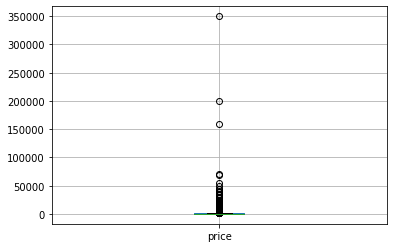

In [ ]:
# Variable Y 
boxplot = datos.boxplot(column=['price'])
boxplot

In [ ]:
#datos[(datos['price'] <1 )]
#datos[(datos['price'] < 10000 )] #sugerencia

datos = datos[(datos['price']>1)]
datos

,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,bathrooms,bathrooms_type
0,35797,153786,28/06/2010,within an hour,1.0,f,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,...,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00,1.0,no information
1,44616,196253,09/08/2010,within a few hours,1.0,f,9,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,49,91.000000,9.000000,10.000000,10.00000,10.000000,f,0.43,5.5,no information
2,56074,265650,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,...,57,98.000000,10.000000,10.000000,10.00000,10.000000,t,0.46,1.0,no information
3,67703,334451,04/01/2011,within a day,1.0,f,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,39,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.34,1.0,no information
4,70644,212109,24/08/2010,within an hour,1.0,t,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,103,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.92,1.0,no information
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,49418556,90103249,15/08/2016,within an hour,1.0,f,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,1.0,no information
15752,49418668,22758914,20/10/2014,within an hour,1.0,f,150,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,2.0,no information
15753,49420689,311812889,24/11/2019,within an hour,1.0,f,0,"['email', 'phone']",t,f,...,0,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,1.0,no information
15754,49422258,397157470,15/04/2021,within an hour,1.0,f,1,['phone'],t,t,...,0,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00,1.0,no information


In [ ]:
# Proceso estadístico con la desviación estándar

factor = 3 #probar con 2 y 3
upper_lim = datos['price'].mean() + datos['price'].std()*factor
print(upper_lim)
lower_lim = datos['price'].mean() - datos['price'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2 = datos[(datos['price'] < upper_lim) & (datos['price'] > lower_lim)]
datos2.shape 

12818.539793746348
-10662.948679814263


(15707, 31)

(array([1.4116e+04, 1.1950e+03, 2.3100e+02, 9.4000e+01, 3.4000e+01,
        2.7000e+01, 9.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        5.0000e+00, 7.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

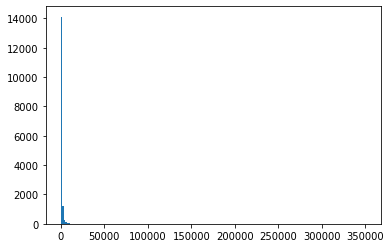

In [ ]:
import matplotlib.pyplot as plt
plt.hist(datos.price, bins = 200)

In [ ]:
# proceso "artesanal" - reflexión

In [ ]:
#percentiles - para fines de la actividad
datos['price'].describe()

count     15755.000000
mean       1077.795557
std        3913.581412
min         145.000000
25%         399.000000
50%         687.000000
75%        1100.000000
max      350000.000000
Name: price, dtype: float64

In [ ]:
upper_lim = datos['price'].quantile(.80)
print(upper_lim)
lower_lim = datos['price'].quantile(.10)
print(lower_lim)

datos = datos[(datos['price'] < upper_lim) & (datos['price'] > lower_lim)]
datos.shape

1289.0
261.4000000000001


(11019, 31)

(array([1009.,  917.,  890.,  664.,  958.,  557.,  768.,  454.,  662.,
         430.,  742.,  357.,  536.,  376.,  555.,  171.,  299.,  169.,
         360.,  145.]),
 array([ 262. ,  313.3,  364.6,  415.9,  467.2,  518.5,  569.8,  621.1,
         672.4,  723.7,  775. ,  826.3,  877.6,  928.9,  980.2, 1031.5,
        1082.8, 1134.1, 1185.4, 1236.7, 1288. ]),
 <a list of 20 Patch objects>)

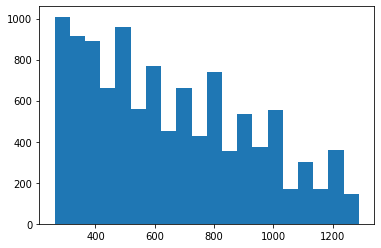

In [ ]:
plt.hist(datos.price, bins = 20)

Tendríamos que contrarestar las demás variables contra la variable Y para ver si hay algún otro valor atípico, (y de preferencia analizarlas individualmente primero)

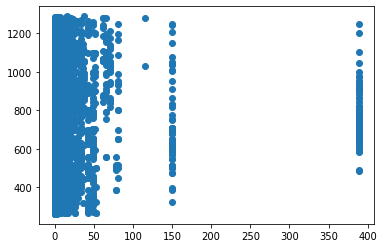

In [ ]:
plt.scatter(x=datos.host_total_listings_count, y=datos.price)
# Parecieran extraños aquellos airbnb que han  registrado a más de 400 personas 

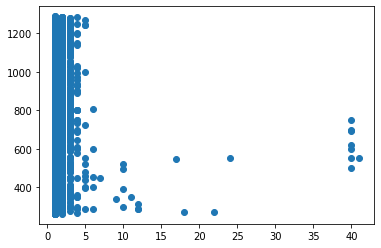

In [ ]:
plt.scatter(x=datos.bedrooms, y=datos.price)
# esquina superior derecha ¿qué hacer con ellos? 

### Transformación de variables

In [ ]:
# VARIABLE Y
## SESGO
datos['price'].skew()
# sesgo a la derecha y no pareciera una distribución normal

0.4618826467390826

(array([265., 650., 243., 208., 560., 230., 604., 170., 145., 405., 186.,
        713., 126., 143., 347., 184., 512., 128., 287., 111., 147., 437.,
        125., 284.,  99., 179., 521.,  81., 227.,  91., 203., 298.,  93.,
        204., 114., 475.,  47.,  60., 100.,  44., 235.,  45.,  50.,  88.,
         50., 307.,  32.,  42.,  77.,  47.]),
 array([ 262.  ,  282.52,  303.04,  323.56,  344.08,  364.6 ,  385.12,
         405.64,  426.16,  446.68,  467.2 ,  487.72,  508.24,  528.76,
         549.28,  569.8 ,  590.32,  610.84,  631.36,  651.88,  672.4 ,
         692.92,  713.44,  733.96,  754.48,  775.  ,  795.52,  816.04,
         836.56,  857.08,  877.6 ,  898.12,  918.64,  939.16,  959.68,
         980.2 , 1000.72, 1021.24, 1041.76, 1062.28, 1082.8 , 1103.32,
        1123.84, 1144.36, 1164.88, 1185.4 , 1205.92, 1226.44, 1246.96,
        1267.48, 1288.  ]),
 <a list of 50 Patch objects>)

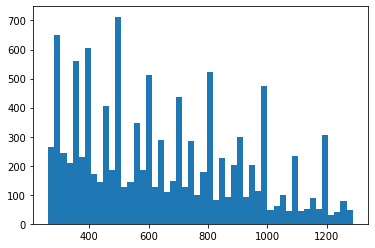

In [ ]:
plt.hist(datos.price, bins = 50)

In [ ]:
import numpy as np

#¿Por qué log? sesgo - rango de valores muy amplio - una cola de la distribución muy notoria, para reducir este sesgo aplicamos esta distribición, nos permite tener nuestros datos en un rango más delimitado
datos['log+1'] = (datos['price']+1).transform(np.log) #+1 porque log(0) no existe
datos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,airbnb_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,bathrooms,bathrooms_type,log+1
2,56074,265650,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,...,98.000000,10.000000,10.000000,10.00000,10.000000,t,0.46,1.0,no information,6.204558
4,70644,212109,24/08/2010,within an hour,1.0,t,4,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,98.000000,10.000000,10.000000,10.00000,10.000000,f,0.92,1.0,no information,6.995766
12,204887,998053,20/08/2011,within a few hours,1.0,f,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,...,91.000000,9.000000,10.000000,10.00000,10.000000,f,0.24,1.0,no information,6.685861
13,217685,184410,29/07/2010,within an hour,1.0,t,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,...,95.000000,9.000000,10.000000,10.00000,10.000000,f,0.11,1.0,no information,6.396930
14,245507,1288063,13/10/2011,within an hour,1.0,t,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,96.000000,9.000000,10.000000,10.00000,10.000000,t,2.36,1.0,no information,6.673298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,49418556,90103249,15/08/2016,within an hour,1.0,f,0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,...,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,1.0,no information,6.408529
15752,49418668,22758914,20/10/2014,within an hour,1.0,f,150,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,2.0,no information,6.949856
15753,49420689,311812889,24/11/2019,within an hour,1.0,f,0,"['email', 'phone']",t,f,...,95.040051,9.582888,9.817357,9.78363,9.816439,t,1.00,1.0,no information,5.786897
15754,49422258,397157470,15/04/2021,within an hour,1.0,f,1,['phone'],t,t,...,95.040051,9.582888,9.817357,9.78363,9.816439,f,1.00,1.0,no information,6.216606


(array([ 942.,  968., 1001.,  858., 1347., 1169., 1326., 1369., 1166.,
         873.]),
 array([5.57215403, 5.73110083, 5.89004763, 6.04899442, 6.20794122,
        6.36688802, 6.52583481, 6.68478161, 6.84372841, 7.00267521,
        7.161622  ]),
 <a list of 10 Patch objects>)

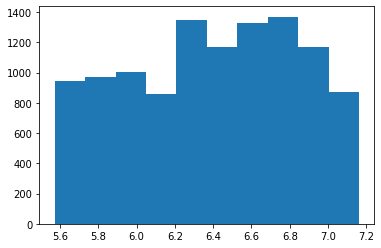

In [ ]:
plt.hist(datos['log+1'], bins = 10)

### Escalamiento y normalización

In [ ]:
datos.describe()

,airbnb_id,host_id,host_response_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,bathrooms,log+1
count,1.101900e+04,1.101900e+04,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,...,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000,11019.000000
mean,3.178707e+07,1.240698e+08,0.922340,9.487975,19.398471,-99.167303,2.765224,1.378256,1.621018,651.752518,...,222.456030,28.643888,95.000923,9.586422,9.824838,9.789257,9.815295,1.261234,1.243398,6.392412
std,1.266702e+07,1.011441e+08,0.225729,37.918669,0.045491,0.034890,1.674275,1.276860,1.322597,270.019982,...,136.844295,50.178225,7.529871,0.788872,0.624357,0.671226,0.594724,1.392650,0.546089,0.427868
min,5.607400e+04,7.365000e+03,0.000000,0.000000,19.185340,-99.340570,1.000000,1.000000,0.000000,262.000000,...,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.000000,5.572154
25%,2.199520e+07,3.915243e+07,1.000000,1.000000,19.373465,-99.179150,2.000000,1.000000,1.000000,404.000000,...,89.000000,1.000000,95.000000,9.582888,9.817357,9.783630,9.816439,0.380000,1.000000,6.003887
50%,3.391213e+07,1.009886e+08,1.000000,2.000000,19.409780,-99.166520,2.000000,1.000000,1.000000,600.000000,...,249.000000,7.000000,95.040051,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,6.398595
75%,4.282847e+07,1.890336e+08,1.000000,5.000000,19.430415,-99.152305,4.000000,2.000000,2.000000,850.000000,...,362.000000,33.000000,99.000000,10.000000,10.000000,10.000000,10.000000,1.430000,1.500000,6.746412
max,4.942614e+07,3.977428e+08,1.000000,389.000000,19.555880,-98.977040,16.000000,41.000000,42.000000,1288.000000,...,365.000000,558.000000,100.000000,10.000000,10.000000,10.000000,10.000000,27.340000,13.000000,7.161622


In [ ]:
datos = datos.drop(['airbnb_id', 'host_id', 'latitude', 'longitude'], axis = 1)

In [ ]:
datos.head(1)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,...,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,reviews_per_month,bathrooms,bathrooms_type,log+1
2,19/10/2010,within an hour,1.0,t,2,"['email', 'phone', 'facebook', 'reviews']",t,f,Entire condominium,Entire home/apt,...,98.0,10.0,10.0,10.0,10.0,t,0.46,1.0,no information,6.204558




> Host response rate = 0 - 1


> Host total listings count = 0 - 389


> Accommodates = 1 - 16


> Bedrooms y beds = 1 - 50


> Min & Max nigths = (1 - 1000) (1 - 50000) **Podemos empezar a ver el cambio de escalas**


> Scores: 0 - 100













In [ ]:
## La estandarización y la normalización se utilizan para el escalado de características 
## (escalar las características a un rango específico en lugar de estar en un rango grande, lo cual es muy complejo de comprender para el modelo)

### Estandarización: Este concepto se refiere a hacer que la distribución de datos sea normal. Transforma la media de los datos en 0 y su varianza en 1. ##MÁS COMÚN
### Normalización: Este concepto se refiere a transformar los datos en el rango [0, 1]. cada uno de los registros de datos en el conjunto de datos 
### se transformará en el rango entre 0 y 1, de modo que los datos caigan dentro de un rango estrecho que ayuda al modelo a aprender.


# Estandarización

columns = ['price','log+1', 'host_since', 'host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'instant_bookable', 'bathrooms_type']
categoricas = pd.DataFrame(datos, columns=columns) #variables categoricas y variable respuesta (y) 

numericas = datos.drop(['price', 'log+1', 'host_since', 'host_response_time', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type','instant_bookable', 'bathrooms_type'], axis = 1)
#numericas.columns #['host_response_rate', 'host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights', 'maximum_nights','availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','reviews_per_month', 'bathrooms']

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas)
scaled


array([[ 0.34405762, -0.19748359, -0.45706845, ...,  0.31058658,
        -0.57535665, -0.44573142],
       [ 0.34405762, -0.14473673, -0.45706845, ...,  0.31058658,
        -0.24503619, -0.44573142],
       [ 0.34405762, -0.22385702, -0.45706845, ...,  0.31058658,
        -0.733336  , -0.44573142],
       ...,
       [ 0.34405762, -0.25023046, -0.45706845, ...,  0.00192369,
        -0.18758916, -0.44573142],
       [ 0.34405762, -0.22385702, -0.45706845, ...,  0.00192369,
        -0.18758916, -0.44573142],
       [ 0.34405762, -0.17111016, -0.45706845, ...,  0.00192369,
        -0.18758916, -0.44573142]])

In [ ]:
numericas = pd.DataFrame(scaled)
numericas.columns = ['host_response_rate', 'host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights', 'maximum_nights','availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','reviews_per_month', 'bathrooms']
numericas

,host_response_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,bathrooms
0,0.344058,-0.197484,-0.457068,-0.296252,-0.469566,-0.104401,-0.543165,0.281676,0.565134,0.398309,0.524289,0.280560,0.313982,0.310587,-0.575357,-0.445731
1,0.344058,-0.144737,-0.457068,-0.296252,-0.469566,0.300009,-0.625949,-0.288341,1.481907,0.398309,0.524289,0.280560,0.313982,0.310587,-0.245036,-0.445731
2,0.344058,-0.223857,-0.457068,-0.296252,-0.469566,-0.053850,-0.625949,1.027082,-0.052692,-0.531364,-0.743401,0.280560,0.313982,0.310587,-0.733336,-0.445731
3,0.344058,-0.223857,-0.457068,-0.296252,0.286557,0.148355,0.491633,-1.428374,-0.411430,-0.000123,-0.743401,0.280560,0.313982,0.310587,-0.826687,-0.445731
4,0.344058,-0.171110,0.140232,-0.296252,-0.469566,-0.154952,-0.732386,-0.112951,4.889915,0.132688,-0.743401,0.280560,0.313982,0.310587,0.789010,-0.445731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,0.344058,-0.250230,0.140232,0.486954,0.286557,0.148355,0.491633,-1.004516,-0.570869,0.005197,-0.004480,-0.011984,-0.008383,0.001924,-0.187589,-0.445731
11015,0.344058,3.705784,1.334833,0.486954,1.042679,-0.154952,-0.834092,0.566684,-0.570869,0.005197,-0.004480,-0.011984,-0.008383,0.001924,-0.187589,1.385557
11016,0.344058,-0.250230,-0.457068,-0.296252,-0.469566,-0.154952,-0.821083,1.041698,-0.570869,0.005197,-0.004480,-0.011984,-0.008383,0.001924,-0.187589,-0.445731
11017,0.344058,-0.223857,-0.457068,-0.296252,-0.469566,-0.053850,-0.407163,1.041698,-0.570869,0.005197,-0.004480,-0.011984,-0.008383,0.001924,-0.187589,-0.445731


In [ ]:
numericas.describe()
#media 0 y desv estandar 1

,host_response_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,bathrooms
count,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04,1.101900e+04
mean,2.450370e-17,3.095204e-17,-1.031735e-17,-6.190408e-17,2.450370e-17,3.224171e-17,-5.287640e-17,-7.738010e-17,2.063469e-17,1.263875e-16,1.650775e-15,-1.217447e-15,-1.021417e-15,-3.373772e-15,-5.674540e-17,-7.802493e-17
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-4.086226e+00,-2.502305e-01,-1.054369e+00,-2.962525e-01,-1.225689e+00,-1.549522e-01,-8.376394e-01,-1.625688e+00,-5.708689e-01,-9.960905e+00,-9.617231e+00,-1.253321e+01,-1.160506e+01,-1.314164e+01,-8.984962e-01,-2.277019e+00
25%,3.440576e-01,-2.238570e-01,-4.570685e-01,-2.962525e-01,-4.695659e-01,-1.549522e-01,-7.323857e-01,-9.752843e-01,-5.509390e-01,-1.225542e-04,-4.479578e-03,-1.198367e-02,-8.383448e-03,1.923694e-03,-6.328037e-01,-4.457314e-01
50%,3.440576e-01,-1.974836e-01,-4.570685e-01,-2.962525e-01,-4.695659e-01,-1.044010e-01,4.916327e-01,1.939809e-01,-4.313598e-01,5.196596e-03,5.242889e-01,2.805601e-01,3.139815e-01,3.105866e-01,-1.875892e-01,-4.457314e-01
75%,3.440576e-01,-1.183633e-01,7.375324e-01,4.869543e-01,2.865567e-01,-1.044010e-01,4.916327e-01,1.019774e+00,8.681674e-02,5.311192e-01,5.242889e-01,2.805601e-01,3.139815e-01,3.105866e-01,1.211887e-01,4.699126e-01
max,3.440576e-01,1.000903e+01,7.905138e+00,3.103202e+01,3.053146e+01,5.034572e+01,5.829250e+01,1.041698e+00,1.055000e+01,6.639296e-01,5.242889e-01,2.805601e-01,3.139815e-01,3.105866e-01,1.872685e+01,2.152973e+01


In [ ]:
numericas = numericas.round(2)

# PCA 

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pca_model = PCA(n_components = 16) #

In [ ]:
pca_model.fit(numericas)

PCA(n_components=16)

In [ ]:
pca_model.components_

array([[-7.04910217e-02, -1.45249990e-02, -1.05321182e-03,
         9.04340420e-03, -2.02396205e-05,  1.20487795e-02,
         1.86304480e-03,  4.43975135e-02, -8.91113462e-02,
        -4.62817593e-01, -4.17194625e-01, -4.54114213e-01,
        -4.56161826e-01, -4.17071639e-01, -8.97744740e-02,
         1.06543269e-02],
       [ 4.64650917e-02,  7.02761265e-02,  5.48198323e-01,
         3.89277749e-01,  5.61725244e-01, -1.60805540e-02,
         3.67986739e-02,  3.40284596e-02,  1.77980545e-01,
        -1.93003799e-02, -1.41775342e-02, -7.92153977e-03,
        -8.20085837e-03, -1.49960475e-02,  1.87076865e-01,
         3.93617277e-01],
       [ 1.66239179e-01,  2.73898061e-01, -4.77753353e-02,
        -1.67633586e-01, -1.57290474e-01, -9.15471363e-02,
         6.51288922e-02,  1.21983893e-01,  6.00631073e-01,
        -8.66505499e-02, -4.85399206e-02, -4.63952855e-02,
        -6.77062517e-02, -2.97254004e-02,  6.26143487e-01,
        -2.10760097e-01],
       [-1.38118263e-01,  4.23188143e

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes. #vector de loadings, cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16']
)

,host_response_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,bathrooms
PC1,-0.070491,-0.014525,-0.001053,0.009043,-0.000020,0.012049,0.001863,0.044398,-0.089111,-0.462818,-0.417195,-0.454114,-0.456162,-0.417072,-0.089774,0.010654
PC2,0.046465,0.070276,0.548198,0.389278,0.561725,-0.016081,0.036799,0.034028,0.177981,-0.019300,-0.014178,-0.007922,-0.008201,-0.014996,0.187077,0.393617
PC3,0.166239,0.273898,-0.047775,-0.167634,-0.157290,-0.091547,0.065129,0.121984,0.600631,-0.086651,-0.048540,-0.046395,-0.067706,-0.029725,0.626143,-0.210760
PC4,-0.138118,0.423188,-0.004162,0.019546,-0.005089,0.148832,0.528300,0.666049,-0.191418,0.001358,0.029610,0.035070,0.038209,0.041600,-0.119325,-0.018929
PC5,-0.523691,-0.113162,-0.016058,0.008658,-0.019385,0.683699,-0.395035,0.195262,0.167299,0.015734,-0.005371,0.011649,0.025367,0.013116,0.143240,0.029586
PC6,0.559871,-0.122816,-0.008241,-0.015021,-0.030850,0.687307,0.367978,-0.242623,0.017335,-0.012185,-0.017058,-0.026089,-0.008485,-0.027390,-0.009923,0.034768
PC7,-0.423348,-0.604209,0.008939,0.024424,0.010849,-0.117369,0.608135,-0.084880,0.219293,0.017439,-0.021857,-0.002294,0.015460,0.004038,0.085287,-0.087743
PC8,-0.419469,0.563975,0.089474,-0.072174,-0.004664,0.100037,0.215342,-0.654004,-0.073466,-0.013393,-0.009882,-0.007811,-0.002673,0.028903,0.026604,-0.036808
PC9,0.023148,0.056060,-0.161444,0.822549,-0.042816,0.031279,-0.032523,-0.053155,-0.018650,0.000774,0.010192,0.005150,-0.000267,-0.023499,0.022984,-0.534243
PC10,-0.039146,0.063267,-0.480945,0.346506,-0.332399,-0.061155,0.072967,-0.047591,0.083109,-0.017497,-0.028658,-0.026510,-0.014459,0.077925,0.100910,0.704323


In [ ]:
# Porcentaje de varianza explicada acumulada ¿Con cuántos componentes se quedarían? 
# ==============================================================================
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum) #propuestas distintas - 85% 95%  - poco poder computacional 75%

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.2299421  0.37258698 0.48414902 0.5527489  0.61623826 0.67691411
 0.73553312 0.7897155  0.8370887  0.8800861  0.91263641 0.93773364
 0.95570769 0.97274164 0.98785059 1.        ]


In [ ]:
proyecciones = np.dot(pca_model.components_, scale(numericas).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.819083,-0.845993,0.126335,-0.228105,0.071240,-0.130679,-0.264447,-0.630429,0.059676,-0.133712,-0.160741,0.039080,0.119468,-0.783034,0.048491,-0.030796
1,-0.951345,-0.647156,0.784170,-0.783860,0.461971,0.254641,-0.126291,-0.261410,0.099378,-0.024888,-0.180771,-0.001176,0.260067,-1.161512,0.073606,-0.020049
2,0.240861,-0.928607,-0.122705,0.320643,0.156552,-0.285269,-0.514092,-1.079896,0.017737,-0.194523,1.037771,-0.186193,0.037477,-0.450926,0.055188,-0.231515
3,-0.068215,-0.640464,-0.812406,-0.617662,-0.710445,0.826107,0.282633,0.802826,0.090555,-0.309846,0.877243,-0.173944,0.622221,-0.152699,-0.206376,0.079124
4,-0.694982,0.514140,3.588748,-1.613923,0.944770,-0.062916,0.733607,-0.615794,-0.072360,0.125678,0.752002,-0.471901,0.325659,-2.751077,-0.222563,0.226728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,0.007822,0.098219,-0.617122,-0.390194,-0.580433,0.705595,0.286825,0.517008,0.649349,-0.329333,0.035453,0.074246,0.025979,0.287838,-0.007630,-0.016314
11015,0.032189,2.182356,0.038793,1.545138,-0.384963,-0.823003,-3.149569,1.445131,-0.383507,0.240003,-0.050623,-0.119447,-0.081971,-0.256923,-0.110271,0.088926
11016,0.085811,-0.938716,-0.145798,0.221818,0.147848,-0.437561,-0.681029,-1.122121,0.054538,-0.235946,0.037310,0.051111,-0.123333,0.257223,-0.047458,-0.012973
11017,0.087345,-0.923121,-0.120022,0.466133,0.050804,-0.221518,-0.461422,-1.006850,0.046008,-0.210233,0.028323,0.048933,-0.113151,0.261659,-0.044687,-0.006090


In [ ]:
conjunto_1 = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
conjunto_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.819083,-0.845993,0.126335,-0.228105,0.071240,-0.130679,-0.264447
1,-0.951345,-0.647156,0.784170,-0.783860,0.461971,0.254641,-0.126291
2,0.240861,-0.928607,-0.122705,0.320643,0.156552,-0.285269,-0.514092
3,-0.068215,-0.640464,-0.812406,-0.617662,-0.710445,0.826107,0.282633
4,-0.694982,0.514140,3.588748,-1.613923,0.944770,-0.062916,0.733607


In [ ]:
conjunto_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.819083,-0.845993,0.126335,-0.228105,0.071240,-0.130679,-0.264447
1,-0.951345,-0.647156,0.784170,-0.783860,0.461971,0.254641,-0.126291
2,0.240861,-0.928607,-0.122705,0.320643,0.156552,-0.285269,-0.514092
3,-0.068215,-0.640464,-0.812406,-0.617662,-0.710445,0.826107,0.282633
4,-0.694982,0.514140,3.588748,-1.613923,0.944770,-0.062916,0.733607
...,...,...,...,...,...,...,...
11014,0.007822,0.098219,-0.617122,-0.390194,-0.580433,0.705595,0.286825
11015,0.032189,2.182356,0.038793,1.545138,-0.384963,-0.823003,-3.149569
11016,0.085811,-0.938716,-0.145798,0.221818,0.147848,-0.437561,-0.681029
11017,0.087345,-0.923121,-0.120022,0.466133,0.050804,-0.221518,-0.461422


### Split variables

Ya lo hicimos con los baños, valdría la pena intentar con "host verification" y construir nuevas variables

por el momento, vamos a eliminar esa columna

In [ ]:
categoricas = categoricas.drop(['host_verifications', 'property_type'], axis = 1)

### Distribución de variables - Binarias y One hot Encoding

In [ ]:
categoricas

,price,log+1,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,instant_bookable,bathrooms_type
2,494,6.204558,19/10/2010,within an hour,t,t,f,Entire home/apt,t,no information
4,1091,6.995766,24/08/2010,within an hour,t,t,t,Entire home/apt,f,no information
12,800,6.685861,20/08/2011,within a few hours,f,t,f,Entire home/apt,f,no information
13,599,6.396930,29/07/2010,within an hour,t,t,t,Entire home/apt,f,no information
14,790,6.673298,13/10/2011,within an hour,t,t,t,Entire home/apt,t,no information
...,...,...,...,...,...,...,...,...,...,...
15751,606,6.408529,15/08/2016,within an hour,f,t,t,Entire home/apt,t,no information
15752,1042,6.949856,20/10/2014,within an hour,f,t,t,Entire home/apt,t,no information
15753,325,5.786897,24/11/2019,within an hour,f,t,f,Private room,t,no information
15754,500,6.216606,15/04/2021,within an hour,f,t,t,Entire home/apt,f,no information


In [ ]:
categoricas2 = categoricas.iloc[:,3:10]
#categoricas2

categoricas2 = pd.get_dummies(categoricas2, drop_first=True)

In [ ]:
categoricas2

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t,bathrooms_type_private,bathrooms_type_shared
2,0,0,1,1,1,0,0,0,0,1,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0
12,0,1,0,0,1,0,0,0,0,0,0,0
13,0,0,1,1,1,1,0,0,0,0,0,0
14,0,0,1,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15751,0,0,1,0,1,1,0,0,0,1,0,0
15752,0,0,1,0,1,1,0,0,0,1,0,0
15753,0,0,1,0,1,0,0,1,0,1,0,0
15754,0,0,1,0,1,1,0,0,0,0,0,0


In [ ]:
categoricas2 = categoricas2.reset_index()
# cuando eliminamos valores en valores atípicos nuestros índices se movieron - cuidado

In [ ]:
categoricas2 

,index,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t,bathrooms_type_private,bathrooms_type_shared
0,2,0,0,1,1,1,0,0,0,0,1,0,0
1,4,0,0,1,1,1,1,0,0,0,0,0,0
2,12,0,1,0,0,1,0,0,0,0,0,0,0
3,13,0,0,1,1,1,1,0,0,0,0,0,0
4,14,0,0,1,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,15751,0,0,1,0,1,1,0,0,0,1,0,0
11015,15752,0,0,1,0,1,1,0,0,0,1,0,0
11016,15753,0,0,1,0,1,0,0,1,0,1,0,0
11017,15754,0,0,1,0,1,1,0,0,0,0,0,0


In [ ]:
todas_las_x = categoricas2.join(conjunto_1)

In [ ]:
todas_las_x

,index,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t,bathrooms_type_private,bathrooms_type_shared,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2,0,0,1,1,1,0,0,0,0,1,0,0,-0.819083,-0.845993,0.126335,-0.228105,0.071240,-0.130679,-0.264447
1,4,0,0,1,1,1,1,0,0,0,0,0,0,-0.951345,-0.647156,0.784170,-0.783860,0.461971,0.254641,-0.126291
2,12,0,1,0,0,1,0,0,0,0,0,0,0,0.240861,-0.928607,-0.122705,0.320643,0.156552,-0.285269,-0.514092
3,13,0,0,1,1,1,1,0,0,0,0,0,0,-0.068215,-0.640464,-0.812406,-0.617662,-0.710445,0.826107,0.282633
4,14,0,0,1,1,1,1,0,0,0,1,0,0,-0.694982,0.514140,3.588748,-1.613923,0.944770,-0.062916,0.733607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,15751,0,0,1,0,1,1,0,0,0,1,0,0,0.007822,0.098219,-0.617122,-0.390194,-0.580433,0.705595,0.286825
11015,15752,0,0,1,0,1,1,0,0,0,1,0,0,0.032189,2.182356,0.038793,1.545138,-0.384963,-0.823003,-3.149569
11016,15753,0,0,1,0,1,0,0,1,0,1,0,0,0.085811,-0.938716,-0.145798,0.221818,0.147848,-0.437561,-0.681029
11017,15754,0,0,1,0,1,1,0,0,0,0,0,0,0.087345,-0.923121,-0.120022,0.466133,0.050804,-0.221518,-0.461422


Al aplicar One hot encoding se genera una variable dummie por cada nivel de cada variable categórica, faltaría eliminar 1 variable dummie para que no se tenga información redundante en el conjunto de datos. 

In [ ]:
y_s = categoricas[['price', 'log+1']]

In [ ]:
y_s

,price,log+1
2,494,6.204558
4,1091,6.995766
12,800,6.685861
13,599,6.396930
14,790,6.673298
...,...,...
15751,606,6.408529
15752,1042,6.949856
15753,325,5.786897
15754,500,6.216606


In [ ]:
y_s = y_s.reset_index()
y_s = y_s[['price', 'log+1']]

In [ ]:
datos1 = todas_las_x.join(y_s)

In [ ]:
datos1 = datos1.drop(['index'], axis=1)

In [ ]:
datos1 

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t,...,bathrooms_type_shared,PC1,PC2,PC3,PC4,PC5,PC6,PC7,price,log+1
0,0,0,1,1,1,0,0,0,0,1,...,0,-0.819083,-0.845993,0.126335,-0.228105,0.071240,-0.130679,-0.264447,494,6.204558
1,0,0,1,1,1,1,0,0,0,0,...,0,-0.951345,-0.647156,0.784170,-0.783860,0.461971,0.254641,-0.126291,1091,6.995766
2,0,1,0,0,1,0,0,0,0,0,...,0,0.240861,-0.928607,-0.122705,0.320643,0.156552,-0.285269,-0.514092,800,6.685861
3,0,0,1,1,1,1,0,0,0,0,...,0,-0.068215,-0.640464,-0.812406,-0.617662,-0.710445,0.826107,0.282633,599,6.396930
4,0,0,1,1,1,1,0,0,0,1,...,0,-0.694982,0.514140,3.588748,-1.613923,0.944770,-0.062916,0.733607,790,6.673298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,0,0,1,0,1,1,0,0,0,1,...,0,0.007822,0.098219,-0.617122,-0.390194,-0.580433,0.705595,0.286825,606,6.408529
11015,0,0,1,0,1,1,0,0,0,1,...,0,0.032189,2.182356,0.038793,1.545138,-0.384963,-0.823003,-3.149569,1042,6.949856
11016,0,0,1,0,1,0,0,1,0,1,...,0,0.085811,-0.938716,-0.145798,0.221818,0.147848,-0.437561,-0.681029,325,5.786897
11017,0,0,1,0,1,1,0,0,0,0,...,0,0.087345,-0.923121,-0.120022,0.466133,0.050804,-0.221518,-0.461422,500,6.216606


Tras aplicar los comentarios adicionales que se presentaron este documento (eliminar una columa de las que se generaron por cada variable categórica), añadir nuevas categorias (feature split), etc... 

Nuestro conjunto de datos estaría listo para pasar a la siguiente etapa dentro del proceso de un proecto de ciencia de datos: Modelado (:


Listo (:

In [ ]:
# FALTARÍA APLICAR FA